In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math
import csv
from pandas import DataFrame

##### you can find the dataset here: https://grouplens.org/datasets/movielens/100k/
data=np.genfromtxt('data/u.data',delimiter='\t')

uID=data[:,][:,0]     # first column
mID=data[:,][:,1]     # second column
rating=data[:,][:,2]  #third column
time=data[:,][:,3]

### number of rows(users), columns(movies) and variety of ratings given by users
MIN_uID=int(min(uID))
MAX_uID=int(max(uID))

MIN_mID=int(min(mID))
MAX_mID=int(max(mID))

MIN_rating=min(rating)
MAX_rating=max(rating)

print('User length:',len(uID))

print ('Num of Users: ',MIN_uID,' to ',MAX_uID, '\nNum of Movies: ',MIN_mID,' to ',MAX_mID,'\nRange of ratings given by users: ',MIN_rating, ' to ',MAX_rating)
rating_Variety=np.unique(rating)
print ('Variety of ratings given by users are: ', rating_Variety)

User length: 100000
Num of Users:  1  to  943 
Num of Movies:  1  to  1682 
Range of ratings given by users:  1.0  to  5.0
Variety of ratings given by users are:  [1. 2. 3. 4. 5.]


In [6]:
##### Raing Matrix
Init_Mat=pd.DataFrame(data=data,index=range(len(data)),columns=['uID','mID','rating','time'])  ##making a dataFrame with columns:['uID','mID','rating']
Init_Mat=Init_Mat.sort_values(by=['uID','mID'])
Init_Matrix=np.array(Init_Mat) #making array
print ('\nA head of array of initial matrix with columns:[uID,mID,rating]:\n',Init_Mat.head())
print('\n---for example:---\nInit_Matrix[1][2] is: ',Init_Matrix[1][2],'\n   means:the data in row 2 column 3')  #data in row 2 column 3
Rating_Matrix=np.zeros((len(np.unique(uID)),len(np.unique(mID))),float)

i=iter(Init_Matrix)

for j in range(len(Init_Matrix)):
    n=next(i)
    x=int(n[0])
    y=int(n[1])
    Rating_Matrix[x-1][y-1]=n[2]
       

print('\n*** the Rating_Matrix len:***\n',len(Rating_Matrix))        
print('\n*** the Rating_Matrix is:***\n',Rating_Matrix)
2


A head of array of initial matrix with columns:[uID,mID,rating]:
        uID  mID  rating         time
32236  1.0  1.0     5.0  874965758.0
23171  1.0  2.0     3.0  876893171.0
83307  1.0  3.0     4.0  878542960.0
62631  1.0  4.0     3.0  876893119.0
47638  1.0  5.0     3.0  889751712.0

---for example:---
Init_Matrix[1][2] is:  3.0 
   means:the data in row 2 column 3

*** the Rating_Matrix len:***
 943

*** the Rating_Matrix is:***
 [[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


2

In [7]:
# Count the number of occurrences of the value 4
rateFlattendata = Rating_Matrix.flatten()
rateFlattendata = rateFlattendata[rateFlattendata != 0]

count = np.count_nonzero(rateFlattendata==5)

print(count)

21201


alpha = 4.035302289062817, beta = 4.347666355201989


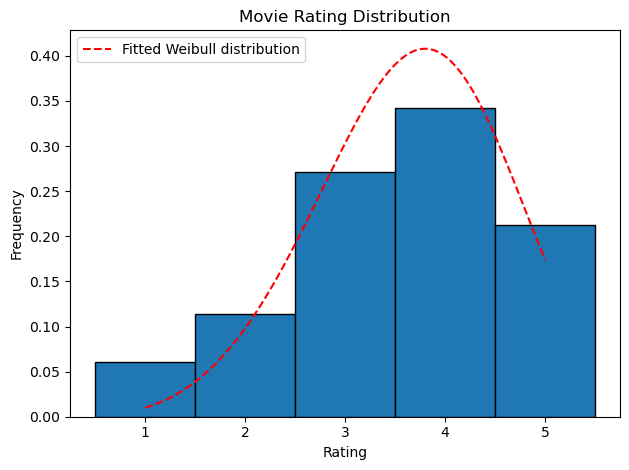

In [8]:
import numpy as np
from scipy.stats import weibull_min
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Define the function to fit a Weibull distribution
def weibull(x, alpha, beta):
    return (beta / alpha) * ((x / alpha) ** (beta - 1)) * np.exp(-((x / alpha) ** beta))

# Fit a Weibull distribution to the data
params, cov = curve_fit(weibull, rateFlattendata, np.arange(1, len(rateFlattendata) + 1) / len(rateFlattendata), p0=[1, 1], bounds=([0, -np.inf], np.inf))

# Print the estimated parameters
print(f"alpha = {params[0]}, beta = {params[1]}")

# Create a histogram of the ratings
fig, ax = plt.subplots()
ax.hist(rateFlattendata, bins=5, range=(1, 6), align="left", edgecolor="black", density=True)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
ax.set_title("Movie Rating Distribution")

# Plot the fitted Weibull distribution
x = np.linspace(1, 5, 1000)
y = weibull(x, *params)
ax.plot(x, y, 'r--', label='Fitted Weibull distribution')

# Add a legend and show the plot
ax.legend()
fig.tight_layout()
plt.show()




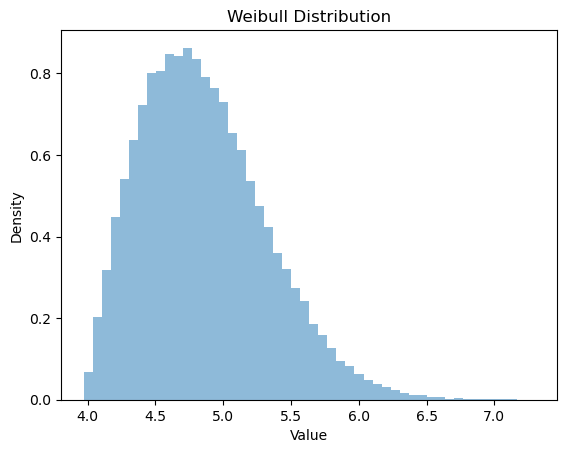

Stored 'Cr' (list)


In [27]:
import numpy as np
from scipy.stats import weibull_min, ks_2samp

# Calculate the corresponding value of k
alpha = params[0]
beta = params[1]

# Generate the global Weibull distribution
#center = 3.8 # 3.97 good
center = 3.97 #good
global_dist = weibull_min.rvs(2, loc=center, size=100000)

#x = np.linspace(1, 5, 1000)
#global_dist = weibull(x, *params)

#global_dist = weibull_min.rvs(beta, loc=0, scale=alpha, size=100000)

# Fit a Weibull distribution to the data
#my_params, my_cov = curve_fit(weibull, global_dist, density = True)

#global_dist = weibull_min.rvs(k, scale=scale, size=10000)

# Plot a histogram of the global_dist array
plt.hist(global_dist, bins=50, density=True, alpha=0.5)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Weibull Distribution")
plt.show()

# Calculate the Kolmogorov-Smirnov statistic and p-value for each user's rating distribution
Cr = []
for i in range(len(Rating_Matrix)):
    my_x = Rating_Matrix[i].flatten()
    my_x = my_x[my_x != 0]
    #x = Rating_Matrix[i][np.nonzero(Rating_Matrix[i])]
    ks_stat, p_value = ks_2samp(my_x, global_dist)
    Cr.append(1- ks_stat)

# Print the resulting distribution parameters and credibility values
#for i in range(len(Rating_Matrix)):
#    print(f"User {i}: alpha = {alpha[i]}, beta = {beta[i]}, Cr = {Cr[i]}")
%store Cr

In [107]:
global_dist

array([4.60358916, 4.73655428, 5.53939809, ..., 4.30297292, 4.82899184,
       4.94155508])

In [108]:
len(global_dist)

100000

In [35]:
ratings_flat = Rating_Matrix[Rating_Matrix != 0].flatten()
ratings_mean = np.mean(ratings_flat)
ratings_mean

3.52986

In [39]:
import numpy as np
from scipy.stats import weibull_min, ks_2samp

# generate the global Weibull distribution
center =  3.97
global_dist = weibull_min.rvs(2, loc=center, size=10000)


# calculate the Kolmogorov-Smirnov statistic and p-value for each user's rating distribution
Cr = []
for i in range(len(Rating_Matrix)):
    a = Rating_Matrix[i]
    x = a[np.nonzero(a)]
    ks_stat, p_value = ks_2samp(x, global_dist)
    Cr.append(ks_stat)

# print the credibility values
#print(Cr)
%store Cr

Stored 'Cr' (list)


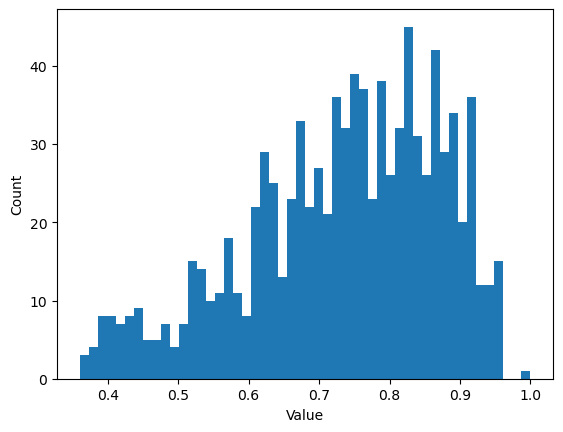

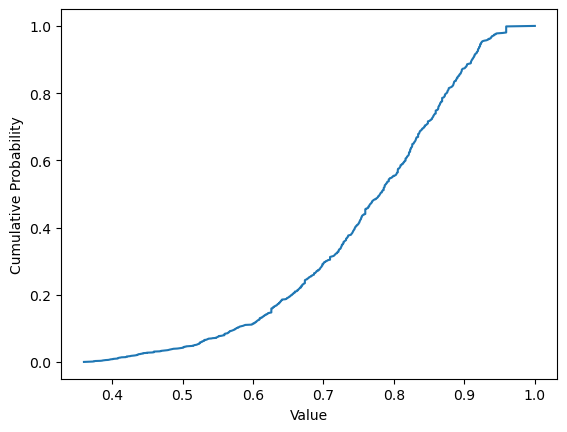

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# generate a series of random numbers
series = Cr #np.random.normal(0, 1, size=1000)

# plot a histogram of the series
fig, ax = plt.subplots()
ax.hist(series, bins=50)
ax.set_xlabel('Value')
ax.set_ylabel('Count')
plt.show()

series = np.array(series)
# calculate the cumulative distribution function
cdf = np.cumsum(np.sort(series)) / series.sum()

# plot the cumulative distribution function
fig, ax = plt.subplots()
ax.plot(np.sort(series), cdf)
ax.set_xlabel('Value')
ax.set_ylabel('Cumulative Probability')
plt.show()

In [112]:
%store Cr


Stored 'Cr' (list)


[5. 3. 4. ... 0. 0. 0.] 1586126
[5. 3. 4. ... 3. 3. 3.] 100000
13.152394995353717 -8.579317746993377 12.60410507035848


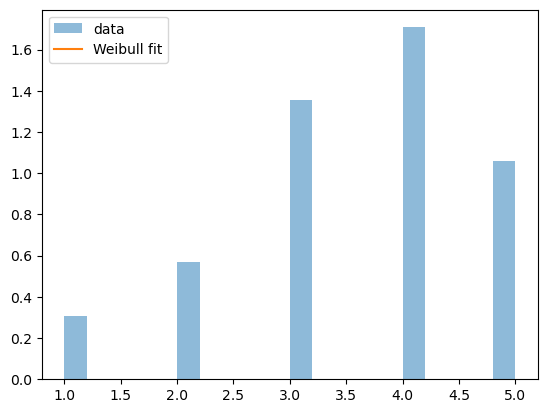

In [126]:
import numpy as np
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

# assume Rating_Matrix is a numpy array containing user ratings, with each row representing a user and each column representing an item
# plot the Weibull distribution for item 0
x = Rating_Matrix.flatten()#[:, 15]
print(x, len(x))
x = x[np.nonzero(x)]
print(x, len(x))


alpha, beta, loc = weibull_min.fit(x)
print(alpha, beta, loc)

plt.hist(x, bins=20, density=True, alpha=0.5, label='data')
x_range = np.linspace(min(x), max(x), 1000)
distb= weibull_min.pdf(x_range, alpha, loc, beta)

plt.plot(x_range, distb, label='Weibull fit')
plt.legend()
plt.show()

Cr = []
for i in range(len(Rating_Matrix)):
    a = Rating_Matrix[i]
    x = a[np.nonzero(a)]
    ks_stat, p_value = ks_2samp(x, distb)
    Cr.append(ks_stat)


In [125]:
distb


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [8]:
x

array([5., 3., 4., ..., 3., 3., 3.])

In [9]:
Rating_Matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [26]:
center=3.97  #the center of total Weibull distribution for all real ratings
Cr=[]  #credibility values for all users
for i in range(len(Rating_Matrix)):
    #print(i)
    a=Rating_Matrix[i]
    x=a[np.nonzero(a)]
    x_bar=np.mean(x)
    x_perim=[]
    if x_bar<=center:
        for k in range(len(x)):
            x_perim.append(5-((5-x[k])*(x_bar/center)))
        AE=np.mean(abs(x-x_perim))
        AE_min=min(abs(x-x_perim))
        Cr.append(np.exp(-(AE-AE_min)))
    else:
        for k in range(len(x)):
            x_perim.append(x[k]*(x_bar/center))
    
    AE=np.mean(abs(x-x_perim))
    AE_min=min(x-x_perim)
    Cr.append(np.exp(-(AE-AE_min)))

%store Cr

#print(Cr)

Stored 'Cr' (list)


In [25]:
Cr

[0.11831084141712866,
 0.38635566389508424,
 0.0811290565592403,
 0.29312352947683984,
 0.4787419830085967,
 0.8402400857921171,
 0.5743697038690765,
 0.44383712288214583,
 0.8156074418370893,
 0.10876949328232,
 0.3640351841943995,
 0.001234527052105694,
 0.005992531047657068,
 0.051200782297213365,
 0.20328492133169307,
 0.5069180833446605,
 0.42218375646156536,
 0.17776318234144783,
 0.5061193735588216,
 0.6316535538968298,
 0.34172315119548524,
 0.7267146343614853,
 0.24347719022505487,
 0.4435147477809537,
 0.8153677312879333,
 0.5693928064564389,
 0.37014650271926997,
 0.7542925893372993,
 0.024813498690534175,
 0.0883342775328213,
 0.14221389357027314,
 0.3754855782591452,
 0.3386485911329943,
 0.7235833921801469,
 0.5335548114507622,
 0.8740719317148351,
 0.22646921891935123,
 0.5851758761163823,
 0.10850606455212441,
 0.36340447010343113,
 0.5640651334299428,
 0.16915877487987763,
 0.41222271074034,
 0.7909612510543771,
 0.27648008258090007,
 0.5832482189217045,
 0.07690184991